In [1]:
#import neccesary libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# read data file 

df = pd.read_csv('kaggle_survey_2020_responses.csv')

/Users/garrettwankel/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# inspect data

df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Find number of observations

df.shape

(20037, 355)

In [5]:
# create list of all questions asked during survey

q_list = list(df.iloc[0])

In [6]:
# inspect list
# some questions have multiple columns where a 'Select Choice' or 'Select All That Apply' answer was requested

q_list

['Duration (in seconds)',
 'What is your age (# years)?',
 'What is your gender? - Selected Choice',
 'In which country do you currently reside?',
 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
 'For how many years have you been writing code and/or programming?',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++',
 'What pro

In [7]:
# keep old column names, and move first row into column space

old_cols = df.columns 
new_cols = df.iloc[0]

df.columns = new_cols

In [8]:
# drop row

df = df.drop([0], axis=0)

In [9]:
# inspect altered dataframe

df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Create lists of all columns of interest (some questions have multiple columns)

cols1 = [col for col in df if 'ML algorithms' in col]
cols2 = [col for col in df if 'computer' in col]
cols3 = [col for col in df if 'cloud computing platforms' in col]
cols4 = [col for col in df if 'cloud computing products' in col]
cols5 = [col for col in df if 'machine learning products' in col]
cols6 = [col for col in df if 'big data products' in col]
cols7 = [col for col in df if 'automated machine learning' in col]
cols8 = [col for col in df if 'machine learning experiments' in col]
cols9 = [col for col in df if 'AutoML tools) on a regular' in col]


In [11]:
cols3_1 = cols3[0:12]
cols3_2 = cols3[13:-1]

In [12]:
cols4_1 = cols4[0:11]
cols4_2 = cols4[12:-1]

In [13]:
cols5_1 = cols5[0:11]
cols5_2 = cols5[12:-1]

In [14]:
cols6_1 = cols6[0:18]
cols6_2 = cols6[20:-1]

In [15]:
cols7_1 = cols7[0:8]
cols7_2 = cols7[9:20]
cols7_3 = cols7[21:28]
cols7_4 = cols7[29:-1]

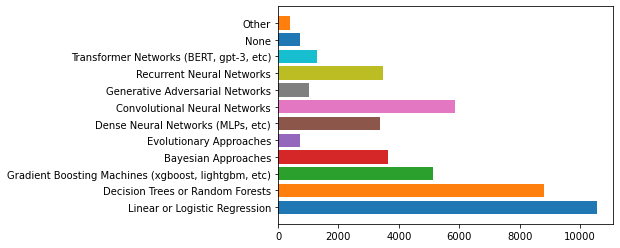

In [16]:
# Which of the following ML algorithms do you use on a regular basis?

for col in cols1:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

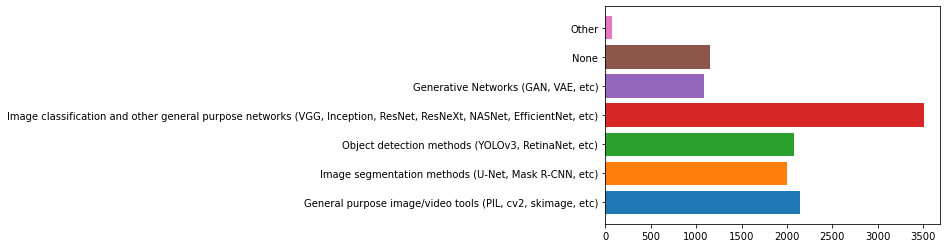

In [17]:
# Which categories of computer vision methods do you use on a regular basis?

for col in cols2:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

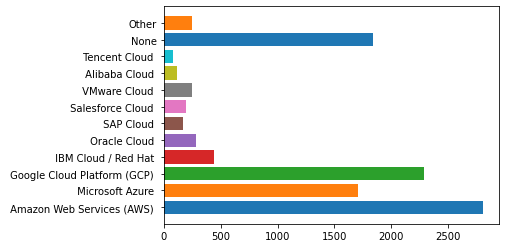

In [18]:
# Which of the following cloud computing platforms do you use on a regular basis?

for col in cols3_1:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

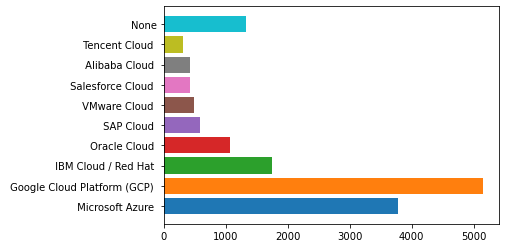

In [19]:
# Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?

for col in cols3_2:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

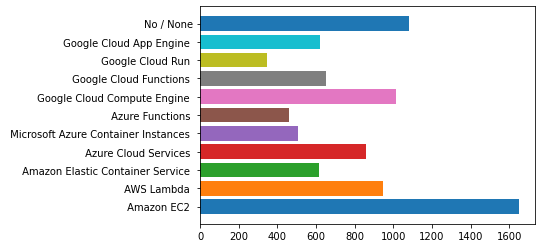

In [20]:
# In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products?

for col in cols4_1:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

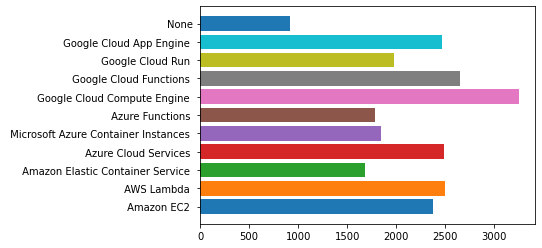

In [21]:
# Do you use any of the following cloud computing products on a regular basis?

for col in cols4_2:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

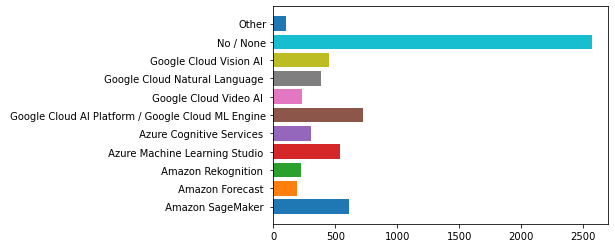

In [22]:
# Do you use any of the following machine learning products on a regular basis?

for col in cols5_1:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

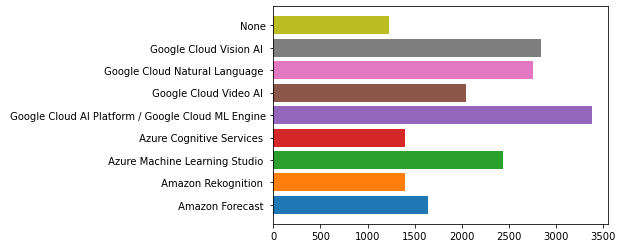

In [23]:
# In the next 2 years, do you hope to become more familiar with any of these specific machine learning products?

for col in cols5_2:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

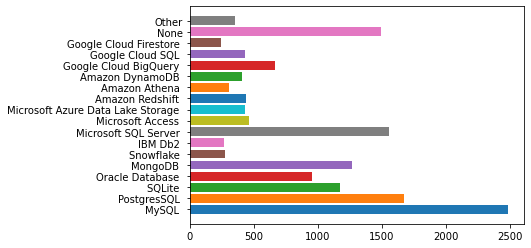

In [24]:
# Which of the following big data products (relational databases, data warehouses, data lakes, or similar) 
# do you use on a regular basis?

for col in cols6_1:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

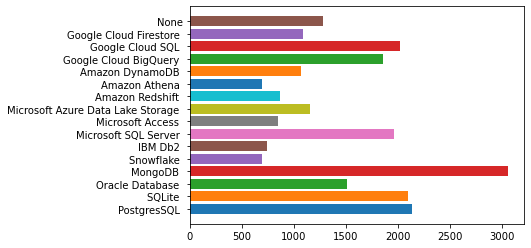

In [25]:
# Which of the following big data products (relational databases, data warehouses, data lakes, or similar) 
# do you hope to become more familiar with in the next 2 years?

for col in cols6_2:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

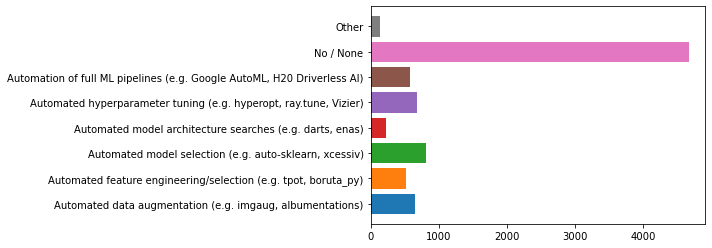

In [26]:
# Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?

for col in cols7_1: 
    plt.barh(df[col].value_counts().index, df[col].value_counts())

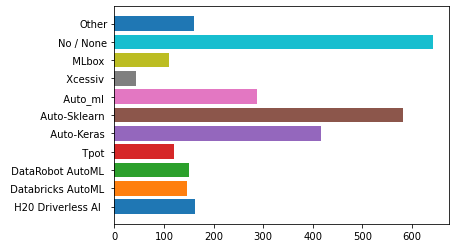

In [27]:
# Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?

for col in cols7_2:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

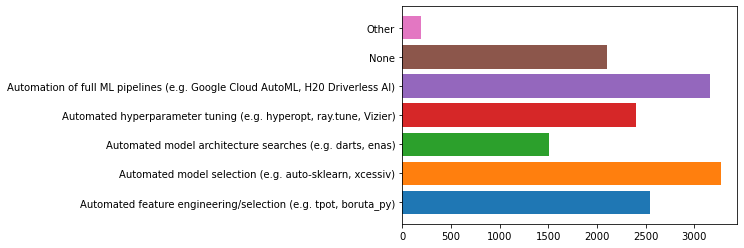

In [28]:
# Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more 
# familiar with in the next 2 years?

for col in cols7_3:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

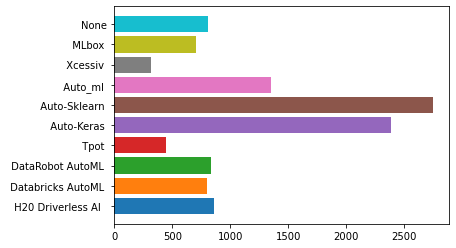

In [29]:
# Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more 
# familiar with in the next 2 years?

for col in cols7_4:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

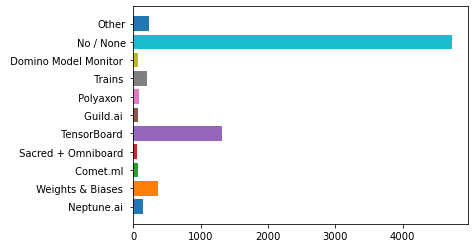

In [30]:
# Do you use any tools to help manage machine learning experiments?

for col in cols8:
    plt.barh(df[col].value_counts().index, df[col].value_counts())

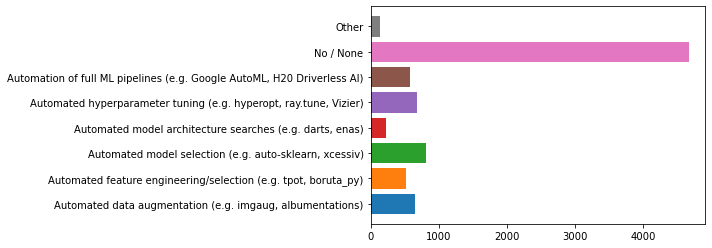

In [31]:
# Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?

for col in cols9:
    plt.barh(df[col].value_counts().index, df[col].value_counts())